# Sample Problem

### For the given Raw Data (in Excel format), test algorithms (show plots wherever necessary) for:
    

The excel file has columns showing the values for time stamps, currents, voltages, frequency etc. After the required packages are imported, the excel file has to be read into an array for further evaluation.

In [2]:
# Importing Packages
import numpy as np
import pandas as pd
import math
import cmath
import matplotlib.pyplot as plt

# Reads the data from the Excel File
df = pd.read_excel('Raw Data.xls', header=None)
NUMERIC = df.values
df.head()

# Known input
Num = 100; # Total Number of Samples = 100
C = 6; # 6 Cycle Window
N = math.floor(Num/C); # Number of Samples per Cycle
S = 960; # Sample Rate
L = N*C; # Number of Samples to be computed
f0 = 60; # Nominal Frequency
DelT = 1/(N*f0); # Change in 't'

**a. Frequency tracking using zero crossing as well as phasor based estimation techniques (assume a 6-cycle window and a 1-cycle reporting rate).**



$\textit{Zero-crossing}$: The simplest algorithm for tracking frequency is the Zero-crossing detection method [1]. It is the most intuitive method for frequency measurement. It detects the zero crossing of the signal and measures the time between two or more zero crossings and estimates the frequency from the measurements. Based on the recorded zero crossing times the frequency is estimated as:
$$f(t_0,t_M) = \frac{M-1}{2} \Bigg(\frac{1}{t_0 - t_M}\Bigg)$$
where, $M$ : Number of Zero-crossings used; $t_M$ : Time of $m^{th}$ Zero Crossing; $t_0$ : Time of First Zero Crossing.

In [4]:
## Frequency Tracking Algorithm for Part(a)

T  = (NUMERIC[0:Num,1-1]- (NUMERIC[0,0] - 1)) / 1000000;
Va  = NUMERIC[0:Num,7-1];
Vb  = NUMERIC[0:Num,8-1];
Vc  = NUMERIC[0:Num,9-1];

############################################# Using Zero-Crossing Technique ################################################

# Computes frequency from Zero-crossings of Va
CNT = 0;
Taold = np.zeros((L,1),dtype=np.complex_)
Tanew = np.zeros((L,1),dtype=np.complex_)
Vaold = np.zeros((L,1),dtype=np.complex_)
Vanew = np.zeros((L,1),dtype=np.complex_)

for j in range (0,L):
    if((Va[j]>0 and Va[j+1]<0) or (Va[j]<0 and Va[j+1]>0)):        
        Taold[CNT] = T[j];
        Tanew[CNT] = T[j+1];
        Vaold[CNT] = Va[j];
        Vanew[CNT] = Va[j+1];
        CNT = CNT + 1;
        
Taold = Taold[ np.argwhere(Taold)[:,0]]          
Tanew = Tanew[ np.argwhere(Tanew)[:,0]] 
Vaold = Vaold[ np.argwhere(Vaold)[:,0]] 
Vanew = Vanew[ np.argwhere(Vanew)[:,0]] 
    
Tfinala = np.zeros((CNT,1),dtype=np.complex_)
for j in range (0,CNT):
    Tfinala[j] = Taold[j] - ((Tanew[j] - Taold[j])/(Vanew[j] - Vaold[j]))*Vaold[j];

print ('\033[1m' + 'Frequency from Zero-crossings of Va')
print ('\033[0m' + 'CNT = ' + str(CNT))
#print (Tfinala[CNT-1])
#print (Tfinala[0])
fa = ((CNT - 1)/2)*(1/(Tfinala[CNT-1] - Tfinala[0]))
print ('fa = ' + str(fa))

# Computes frequency from Zero-crossings of Vb
CNT = 0;
Tbold = np.zeros((L,1),dtype=np.complex_)
Tbnew = np.zeros((L,1),dtype=np.complex_)
Vbold = np.zeros((L,1),dtype=np.complex_)
Vbnew = np.zeros((L,1),dtype=np.complex_)

for j in range (0,L):
    if((Vb[j]>0 and Vb[j+1]<0) or (Vb[j]<0 and Vb[j+1]>0)):        
        Tbold[CNT] = T[j];
        Tbnew[CNT] = T[j+1];
        Vbold[CNT] = Vb[j];
        Vbnew[CNT] = Vb[j+1];
        CNT = CNT + 1;
        
Tbold = Tbold[ np.argwhere(Tbold)[:,0]]          
Tbnew = Tbnew[ np.argwhere(Tbnew)[:,0]] 
Vbold = Vbold[ np.argwhere(Vbold)[:,0]] 
Vbnew = Vbnew[ np.argwhere(Vbnew)[:,0]] 
    
Tfinalb = np.zeros((CNT,1),dtype=np.complex_)
for j in range (0,CNT):
    Tfinalb[j] = Tbold[j] - ((Tbnew[j] - Tbold[j])/(Vbnew[j] - Vbold[j]))*Vbold[j];

print ('\033[1m' + 'Frequency from Zero-crossings of Vb')
print ('\033[0m' + 'CNT = ' + str(CNT))
#print (Tfinalb[CNT-1])
#print (Tfinalb[0])
fb = ((CNT - 1)/2)*(1/(Tfinalb[CNT-1] - Tfinalb[0]))
print ('fb = ' + str(fb))
    
# Computes frequency from Zero-crossings of Vc
CNT = 0;
Tcold = np.zeros((L,1),dtype=np.complex_)
Tcnew = np.zeros((L,1),dtype=np.complex_)
Vcold = np.zeros((L,1),dtype=np.complex_)
Vcnew = np.zeros((L,1),dtype=np.complex_)

for j in range (0,L):
    if((Vc[j]>0 and Vc[j+1]<0) or (Vc[j]<0 and Vc[j+1]>0)):        
        Tcold[CNT] = T[j];
        Tcnew[CNT] = T[j+1];
        Vcold[CNT] = Vc[j];
        Vcnew[CNT] = Vc[j+1];
        CNT = CNT + 1;
        
Tcold = Tcold[ np.argwhere(Tcold)[:,0]]          
Tcnew = Tcnew[ np.argwhere(Tcnew)[:,0]] 
Vcold = Vcold[ np.argwhere(Vcold)[:,0]] 
Vcnew = Vcnew[ np.argwhere(Vcnew)[:,0]] 
    
Tfinalc = np.zeros((CNT,1),dtype=np.complex_)
for j in range (0,CNT):
    Tfinalc[j] = Tcold[j] - ((Tcnew[j] - Tcold[j])/(Vcnew[j] - Vcold[j]))*Vcold[j];

print ('\033[1m' + 'Frequency from Zero-crossings of Vc')
print ('\033[0m' + 'CNT = ' + str(CNT))
#print (Tfinalc[CNT-1])
#print (Tfinalc[0])
fc = ((CNT - 1)/2)*(1/(Tfinalc[CNT-1] - Tfinalc[0]))
print ('fc = ' + str(fc))

# Computes for the mean of the three frequencies obtained above
freq = [ fa, fb, fc ]
mean_freq = np.mean(freq)
print ('\033[1m' + 'Mean Frequency from Zero-crossings of Va, Vb and Vc')
print ('\033[0m' + 'freq = ' + str(mean_freq))

Frequency from Zero-crossings of Va
CNT = 12
fa = [59.69987381+0.j]
Frequency from Zero-crossings of Vb
CNT = 12
fb = [59.95564743+0.j]
Frequency from Zero-crossings of Vc
CNT = 12
fc = [60.01325326+0.j]
Mean Frequency from Zero-crossings of Va, Vb and Vc
freq = (59.88959149856547+0j)


This technique is vulnerable in the presence of noise, and at most one new frequency measurement result can be obtained every cycle. Additionally, for high accuracy, very expensive oscillator and peripheral circuit are necessary for precise timing [2]. To counter for these vulnerabilities, the frequencies obtained from the three voltage signals have been averaged.

$\textit{Phasor based estimation}$: This DFT-based frequency measurement technique is the most widely used algorithm in the commercial PMUs. Using phasors, frequency can be obtained from the rate of change of the angles:
$$f = \frac{1}{2 \pi} \frac{d \theta}{dt}$$

In [7]:
############################################# Phasor Based Estimation Technique ############################################

f   = NUMERIC[0:L,12-1];

# Computes the Positive Sequence Phasor
alpha = np.array([np.cos(2*math.pi/3) + np.sin(2*math.pi/3)*1j]);
Vzero = (Va + Vb + Vc)/3;
Vpos = (Va + alpha*Vb + (alpha**2)*Vc)/3;
Vneg = (Va + (alpha**2)*Vb + alpha*Vc)/3;
v = abs(Vpos);

# Computes the Phasor for Off-Nominal Frequencies
Vnew = np.zeros((L,1),dtype=np.complex_)
V = np.zeros((L,1),dtype=np.complex_)

for j in range (0, L):
    if(j<N):
        V[j] = 0;
        for k in range(0,N):
            V[j] = V[j] + (2/N)*v[k]*(math.cos(2*math.pi*(k)/N) - 1J*math.sin(2*math.pi*(k)/N));

        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Vnew[j] = P*V[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j+1-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j+1-N))) + Q*np.conj(V[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j+1-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j+1-N)));
    else:
        V[j] = (2/N)*(v[j]-v[j-N])*(math.cos(2*math.pi*(j)/N) - 1J*math.sin(2*math.pi*(j)/N)) + V[j-1];
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Vnew[j] = P*V[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j+1-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j+1-N))) + Q*np.conj(V[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j+1-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j+1-N)));
        
    Vmag = abs(Vnew)
    Vang = np.angle(Vnew)

f1 = f0 + (1/2*math.pi)*((-1*Vang[80-1] + 8*Vang[64-1] - 8*Vang[32-1] + Vang[16-1])/(12*16));
f2 = f0 + (1/2*math.pi)*((-1*Vang[96-1] + 8*Vang[80-1] - 8*Vang[48-1] + Vang[32])/(12*16));
f = [ f1, f2 ]
freq = np.mean(f)
print ('\033[1m' + 'Mean Frequency from two measurements')
print ('\033[0m' + 'freq = ' + str(freq))

Mean Frequency from two measurements
freq = 59.8794382446427


This technique is simple in terms of computation burden. Under the assumption that the system frequency is very close to 60 Hz in normal operation, the leakage error of DFT is very small. So phasor angle analysis can provide highly accurate frequency estimation with minimum computation complexity and time.

**b. A Frequency tracking phasor algorithm that computes positive sequence phasors at reporting rates of 1-cycle, 2-cycle, and 5-cycles.**



The frequency tracking phasor algorithm was developed using the following recursive algorithm,
$$ X(N + r) = X(N + r - 1) + \frac{\sqrt{2}}{N}(x_{N = r} - x_r)e^{-j r \theta} $$
Where $\theta$ is the angle between the successive samples based on the period of the fundamental frequency.

Now, since the estimate was performed at off-nominal frequencies, we need to incorporate the phasor correcting terms P and Q,
$$ X'_r = P X e^{jr(\omega - \omega_0)\Delta t} + Q X* e^{-jr(\omega + \omega_0)\Delta t} $$
where $X$ is the correct value of the phasor at the off-nominal frequency and $X'_r$ is our desired Phasor. P and Q are the correcting terms and are of the form
$$ P = \Bigg\{\frac{\sin\Big(\frac{N (\omega - \omega_0)\Delta t}{2}\Big)}{N \sin\Big(\frac{(\omega - \omega_0)\Delta t}{2}\Big)}\Bigg\} e^{j (N-1) \frac{(\omega - \omega_0)\Delta t}{2}} $$
$$ Q = \Bigg\{\frac{\sin\Big(\frac{N (\omega + \omega_0)\Delta t}{2}\Big)}{N \sin\Big(\frac{(\omega + \omega_0)\Delta t}{2}\Big)}\Bigg\} e^{-j (N-1) \frac{(\omega + \omega_0)\Delta t}{2}} $$

The symmetrical components can then be computed using the formula
$$ X_{zero} = \frac{X_a + X_b + X_c}{3} $$
$$ X_{positive} = \frac{X_a + \alpha X_b + \alpha^2 X_c}{3} $$
$$ X_{negative} = \frac{X_a + \alpha^2 X_b + \alpha X_c}{3} $$
where $X_a$, $X_b$ and $X_c$ are the desired phase voltages/currents calculated earlier and $\alpha = e^{\big(j \frac{2 \pi}{3}\big)}$.

Since the given network was a negative sequence network, it was the negative symmetrical component which was dominant in all the computations. So using the negative sequence as the primary output source, the Negative Sequence Phasors are computed at different reporting rates.

In [40]:
## Frequency Tracking Algorithm for Part(b)

Ia  = NUMERIC[0:L,2-1];
Ib  = NUMERIC[0:L,3-1];
Ic  = NUMERIC[0:L,4-1];
Va  = NUMERIC[0:L,7-1];
Vb  = NUMERIC[0:L,8-1];
Vc  = NUMERIC[0:L,9-1];
f  = NUMERIC[0:L,12-1];

# Computes the Phasor for Off-Nominal Frequencies of Va
v = Va
Vaold = np.zeros((L,1),dtype=np.complex_)
Vanew = np.zeros((L,1),dtype=np.complex_)

for j in range (0, L):
    if(j<=N):
        Vaold[j] = 0;
        for k in range(0,N):
            Vaold[j] = Vaold[j] + (math.sqrt(2)/N)*v[k]*(math.cos(2*math.pi*k/N) - 1J*math.sin(2*math.pi*k/N));
        
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Vanew[j] = P*Vaold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vaold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
    else:
        Vaold[j] = (math.sqrt(2)/N)*(v[j]-v[j-N])*(math.cos(2*math.pi*(j-1)/N) - 1J*math.sin(2*math.pi*(j-1)/N)) + Vaold[j-1];
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Vanew[j] = P*Vaold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vaold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
    
# Computes the Phasor for Off-Nominal Frequencies of Vb
v = Vb
Vbold = np.zeros((L,1),dtype=np.complex_)
Vbnew = np.zeros((L,1),dtype=np.complex_)

for j in range (0, L):
    if(j<=N):
        Vbold[j] = 0;
        for k in range(0,N):
            Vbold[j] = Vbold[j] + (math.sqrt(2)/N)*v[k]*(math.cos(2*math.pi*k/N) - 1J*math.sin(2*math.pi*k/N));

        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Vbnew[j] = P*Vbold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vbold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
    else:
        Vbold[j] = (math.sqrt(2)/N)*(v[j]-v[j-N])*(math.cos(2*math.pi*(j-1)/N) - 1J*math.sin(2*math.pi*(j-1)/N)) + Vbold[j-1];
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Vbnew[j] = P*Vbold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vbold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));

# Computes the Phasor for Off-Nominal Frequencies of Vc
v = Vc;
Vcold = np.zeros((L,1),dtype=np.complex_)
Vcnew = np.zeros((L,1),dtype=np.complex_)

for j in range (0, L):
    if(j<=N):
        Vcold[j] = 0;
        for k in range(0,N):
            Vcold[j] = Vcold[j] + (math.sqrt(2)/N)*v[k]*(math.cos(2*math.pi*k/N) - 1J*math.sin(2*math.pi*k/N));

        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Vcnew[j] = P*Vcold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vcold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
    else:
        Vcold[j] = (math.sqrt(2)/N)*(v[j]-v[j-N])*(math.cos(2*math.pi*(j-1)/N) - 1J*math.sin(2*math.pi*(j-1)/N)) + Vcold[j-1];
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Vcnew[j] = P*Vcold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vcold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));

# Computes the Phasor for Off-Nominal Frequencies of Ia
I = Ia;
Iaold = np.zeros((L,1),dtype=np.complex_)
Ianew = np.zeros((L,1),dtype=np.complex_)
for j in range (0, L):
    if(j<=N):
        Iaold[j] = 0;
        for k in range(0,N):
            Iaold[j] = Iaold[j] + (math.sqrt(2)/N)*I[k]*(math.cos(2*math.pi*k/N) - 1J*math.sin(2*math.pi*k/N));
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Ianew[j] = P*Iaold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Iaold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
    else:
        Iaold[j] = (math.sqrt(2)/N)*(I[j]-I[j-N])*(math.cos(2*math.pi*(j-1)/N) - 1J*math.sin(2*math.pi*(j-1)/N)) + Iaold[j-1];
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Ianew[j] = P*Iaold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Iaold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));

# Computes the Phasor for Off-Nominal Frequencies of Ib
I = Ib;
Ibold = np.zeros((L,1),dtype=np.complex_)
Ibnew = np.zeros((L,1),dtype=np.complex_)

for j in range (0, L):
    if(j<N):
        Ibold[j] = 0;
        for k in range(0,N):
            Ibold[j] = Ibold[j] + (math.sqrt(2)/N)*I[k]*(math.cos(2*math.pi*k/N) - 1J*math.sin(2*math.pi*k/N));

        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Ibnew[j] = P*Ibold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Ibold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
    else:
        Ibold[j] = (math.sqrt(2)/N)*(I[j]-I[j-N])*(math.cos(2*math.pi*(j-1)/N) - 1J*math.sin(2*math.pi*(j-1)/N)) + Ibold[j-1];
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Ibnew[j] = P*Ibold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Ibold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));

# Computes the Phasor for Off-Nominal Frequencies of Ic
I = Ic;
Icold = np.zeros((L,1),dtype=np.complex_)
Icnew = np.zeros((L,1),dtype=np.complex_)

for j in range (0, L):
    if(j<=N):
        Icold[j] = 0;
        for k in range(0,N):
            Icold[j] = Icold[j] + (math.sqrt(2)/N)*I[k]*(math.cos(2*math.pi*k/N) - 1J*math.sin(2*math.pi*k/N));

        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Icnew[j] = P*Icold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Icold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
    else:
        Icold[j] = (math.sqrt(2)/N)*(I[j]-I[j-N])*(math.cos(2*math.pi*(j-1)/N) - 1J*math.sin(2*math.pi*(j-1)/N)) + Icold[j-1];
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Icnew[j] = P*Icold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Icold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));

# Computes the Zero-Positive-Negative Sequence Voltage Phasor for un-corrected phasor
alpha = math.cos(2*math.pi/3) + 1J*math.sin(2*math.pi/3);
Vzeroold = (Vaold + Vbold + Vcold)/3;
Vposold = (Vaold + alpha*Vbold + ((alpha)*alpha)*Vcold)/3;
Vnegold = (Vaold + ((alpha)*alpha)*Vbold + alpha*Vcold)/3;
Voutold = abs(Vnegold);

# Computes the Zero-Positive-Negative Sequence Voltage Phasor for corrected phasor
Vzeronew = (Vanew + Vbnew + Vcnew)/3;
Vposnew = (Vanew + alpha*Vbnew + ((alpha)*alpha)*Vcnew)/3;
Vnegnew = (Vanew + ((alpha)*alpha)*Vbnew + alpha*Vcnew)/3;
Voutnew = abs(Vnegnew);

# Computes the Zero-Positive-Negative Sequence Current Phasor for un-corrected phasor
Izeroold = (Iaold + Ibold + Icold)/3;
Iposold = (Iaold + alpha*Ibold + ((alpha)*alpha)*Icold)/3;
Inegold = (Iaold + ((alpha)*alpha)*Ibold + alpha*Icold)/3;
Ioutold = abs(Inegold);

# Computes the Zero-Positive-Negative Sequence Current Phasor for corrected phasor
Izeronew = (Ianew + Ibnew + Icnew)/3
Iposnew = (Ianew + alpha*Ibnew + ((alpha)*alpha)*Icnew)/3;
Inegnew = (Ianew + (alpha*alpha)*Ibnew + alpha*Icnew)/3;
Ioutnew = abs(Inegnew);

# 1-Cycle Reporting Rate
c = 0;
for j in range(16,96+1,16):
    c = c + 1;
V1cycle = np.zeros((c,1),dtype=np.complex_)
I1cycle = np.zeros((c,1),dtype=np.complex_)
    
c = 0;
for j in range(16,96+1,16):
    V1cycle[c] = Vnegnew[j-1];
    I1cycle[c] = Inegnew[j-1];
    c = c + 1;

V1cyclemag = abs(V1cycle)
V1cycleang = np.angle(V1cycle)
I1cyclemag = abs(I1cycle)
I1cycleang = np.angle(I1cycle)

print('\033[1m' + '1-Cycle reporting rate: ')
print ('\033[0m' + 'V_mag = ' + str(np.transpose(V1cyclemag)))
print ('V_ang = ' + str(np.transpose(V1cycleang)))
print ('I_mag = ' + str(np.transpose(I1cyclemag)))
print ('I_ang = ' + str(np.transpose(I1cycleang)))

# 2-Cycle Reporting Rate
c = 0;
for j in range(16,96+1,32):
    c = c + 1;
V2cycle = np.zeros((c,1),dtype=np.complex_)
I2cycle = np.zeros((c,1),dtype=np.complex_)

c = 0;
for j in range(16,96+1,32):
    V2cycle[c] = Vnegnew[j-1];
    I2cycle[c] = Inegnew[j-1];
    c = c + 1;

V2cyclemag = abs(V2cycle)
V2cycleang = np.angle(V2cycle)
I2cyclemag = abs(I2cycle)
I2cycleang = np.angle(I2cycle)

print('\033[1m' + '2-Cycle reporting rate: ')
print ('\033[0m' + 'V_mag = ' + str(np.transpose(V2cyclemag)))
print ('V_ang = ' + str(np.transpose(V2cycleang)))
print ('I_mag = ' + str(np.transpose(I2cyclemag)))
print ('I_ang = ' + str(np.transpose(I2cycleang)))

# 5-Cycle Reporting Rate
c = 0;
for j in range(16,96+1,64):
    c = c + 1;
V5cycle = np.zeros((c,1),dtype=np.complex_)
I5cycle = np.zeros((c,1),dtype=np.complex_)

c = 0;
for j in range(16,96+1,64):
    V5cycle[c] = Vnegnew[j-1];
    I5cycle[c] = Inegnew[j-1];
    c = c + 1;

V5cyclemag = abs(V5cycle)
V5cycleang = np.angle(V5cycle)
I5cyclemag = abs(I5cycle)
I5cycleang = np.angle(I5cycle)

print('\033[1m' + '5-Cycle reporting rate: ')
print ('\033[0m' + 'V_mag = ' + str(np.transpose(V5cyclemag)))
print ('V_ang = ' + str(np.transpose(V5cycleang)))
print ('I_mag = ' + str(np.transpose(I5cyclemag)))
print ('I_ang = ' + str(np.transpose(I5cycleang)))

1-Cycle reporting rate: 
V_mag = [[8.58513052 8.5956247  8.61233514 8.2872711  7.99479683 8.02763107]]
V_ang = [[-2.00732338 -2.00995121 -2.01031852 -2.0207852  -2.08649477 -2.1070477 ]]
I_mag = [[ 16.46817748  16.48297758  16.52867579 161.14853808 382.62315242
  386.97917013]]
I_ang = [[-1.88977895 -1.89148581 -1.89242703 -1.96577186 -1.92244526 -1.92539098]]
2-Cycle reporting rate: 
V_mag = [[8.58513052 8.61233514 7.99479683]]
V_ang = [[-2.00732338 -2.01031852 -2.08649477]]
I_mag = [[ 16.46817748  16.52867579 382.62315242]]
I_ang = [[-1.88977895 -1.89242703 -1.92244526]]
5-Cycle reporting rate: 
V_mag = [[8.58513052 7.99479683]]
V_ang = [[-2.00732338 -2.08649477]]
I_mag = [[ 16.46817748 382.62315242]]
I_ang = [[-1.88977895 -1.92244526]]


**c. Computing all time-synchronized valid harmonics.**



The time synchronized valid harmonics can be computed as follows
$$ X_m = \frac{\sqrt{2}}{N} \sum_{n=0}^{N-1} x(n) \Big\{ \cos\big({2 \pi \frac{m}{N} n}\big) - j \sin\big({2 \pi \frac{m}{N} n}\big) \Big\} $$
where $m$ is the index of the DFT output that will vary from $1$ to $\frac{N}{2}-1$, $n$ is the time domain index of the sampled signal and $N$ is the number of samples of the input signal.

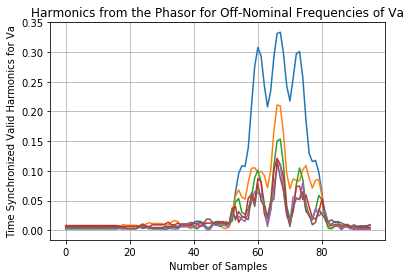

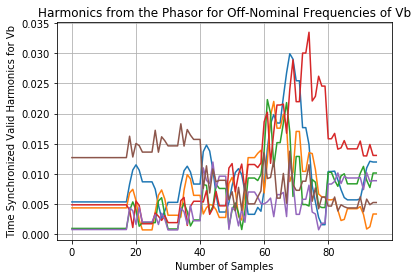

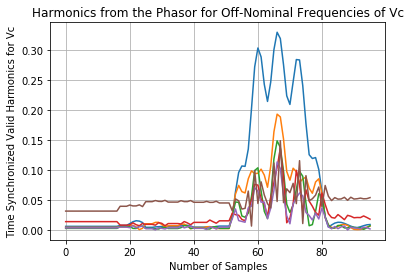

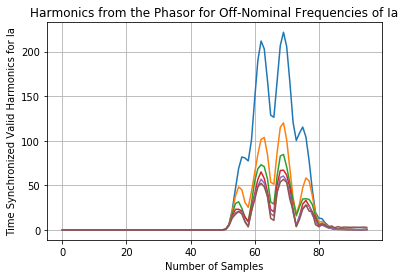

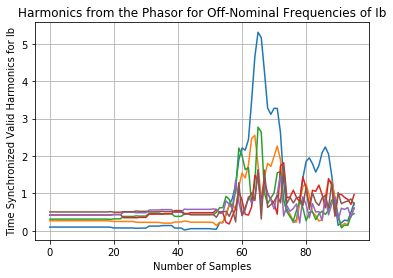

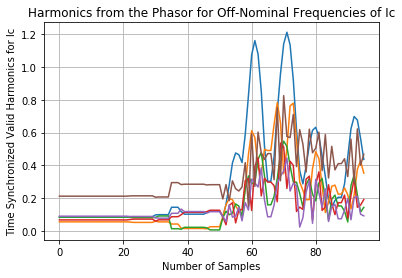

In [41]:
## Time Synchronized Harmonics for Part(c)

Ia  = NUMERIC[0:L,2-1];
Ib  = NUMERIC[0:L,3-1];
Ic  = NUMERIC[0:L,4-1];
Va  = NUMERIC[0:L,7-1];
Vb  = NUMERIC[0:L,8-1];
Vc  = NUMERIC[0:L,9-1];
f  = NUMERIC[0:L,12-1];

# Computes the Harmonics from the Phasor for Off-Nominal Frequencies of Va
v = Va
Vaold = np.zeros((L,1),dtype=np.complex_)
Vanew = np.zeros((L,1),dtype=np.complex_)

for m in range(2,8):
    for j in range (0, L):
        if(j<=N):
            Vaold[j] = 0;
            for k in range(0,N):
                Vaold[j] = Vaold[j] + (math.sqrt(2)/N)*v[k]*(math.cos(2*math.pi*m*k/N) - 1J*math.sin(2*math.pi*m*k/N));

            ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
            eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
            P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
            Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
            Vanew[j] = P*Vaold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vaold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
        else:
            Vaold[j] = (math.sqrt(2)/N)*(v[j]-v[j-N])*(math.cos(2*math.pi*(j-1)*m/N) - 1J*math.sin(2*math.pi*(j-1)*m/N)) + Vaold[j-1];
            ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
            eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
            P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
            Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
            Vanew[j] = P*Vaold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vaold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
            
        Vamag = abs(Vanew)
        Vaang = np.angle(Vanew)

    plt.plot(Vamag)

plt.xlabel('Number of Samples')
plt.ylabel('Time Synchronized Valid Harmonics for Va')
plt.title('Harmonics from the Phasor for Off-Nominal Frequencies of Va')
plt.grid()
plt.show()

# Computes the Harmonics from the Phasor for Off-Nominal Frequencies of Vb
v = Vb
Vbold = np.zeros((L,1),dtype=np.complex_)
Vbnew = np.zeros((L,1),dtype=np.complex_)

for m in range(2,8):
    for j in range (0, L):
        if(j<=N):
            Vbold[j] = 0;
            for k in range(0,N):
                Vbold[j] = Vbold[j] + (math.sqrt(2)/N)*v[k]*(math.cos(2*math.pi*m*k/N) - 1J*math.sin(2*math.pi*m*k/N));

            ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
            eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
            P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
            Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
            Vbnew[j] = P*Vbold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vbold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
        else:
            Vbold[j] = (math.sqrt(2)/N)*(v[j]-v[j-N])*(math.cos(2*math.pi*(j-1)*m/N) - 1J*math.sin(2*math.pi*(j-1)*m/N)) + Vbold[j-1];
            ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
            eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
            P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
            Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
            Vbnew[j] = P*Vbold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vbold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
            
        Vbmag = abs(Vbnew)
        Vbang = np.angle(Vbnew)

    plt.plot(Vbmag)

plt.xlabel('Number of Samples')
plt.ylabel('Time Synchronized Valid Harmonics for Vb')
plt.title('Harmonics from the Phasor for Off-Nominal Frequencies of Vb')
plt.grid()
plt.show()

# Computes the Harmonics from the Phasor for Off-Nominal Frequencies of Vc
v = Vc
Vcold = np.zeros((L,1),dtype=np.complex_)
Vcnew = np.zeros((L,1),dtype=np.complex_)

for m in range(2,8):
    for j in range (0, L):
        if(j<=N):
            Vcold[j] = 0;
            for k in range(0,N):
                Vcold[j] = Vcold[j] + (math.sqrt(2)/N)*v[k]*(math.cos(2*math.pi*m*k/N) - 1J*math.sin(2*math.pi*m*k/N));

            ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
            eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
            P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
            Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
            Vcnew[j] = P*Vcold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vcold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
        else:
            Vcold[j] = (math.sqrt(2)/N)*(v[j]-v[j-N])*(math.cos(2*math.pi*(j-1)*m/N) - 1J*math.sin(2*math.pi*(j-1)*m/N)) + Vcold[j-1];
            ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
            eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
            P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
            Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
            Vcnew[j] = P*Vcold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vcold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
            
        Vcmag = abs(Vcnew)
        Vcang = np.angle(Vcnew)

    plt.plot(Vcmag)

plt.xlabel('Number of Samples')
plt.ylabel('Time Synchronized Valid Harmonics for Vc')
plt.title('Harmonics from the Phasor for Off-Nominal Frequencies of Vc')
plt.grid()
plt.show()

# Computes the Harmonics from the Phasor for Off-Nominal Frequencies of Ia
I = Ia
Iaold = np.zeros((L,1),dtype=np.complex_)
Ianew = np.zeros((L,1),dtype=np.complex_)

for m in range(2,8):
    for j in range (0, L):
        if(j<=N):
            Iaold[j] = 0;
            for k in range(0,N):
                Iaold[j] = Iaold[j] + (math.sqrt(2)/N)*I[k]*(math.cos(2*math.pi*m*k/N) - 1J*math.sin(2*math.pi*m*k/N));

            ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
            eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
            P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
            Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
            Ianew[j] = P*Iaold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Iaold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
        else:
            Iaold[j] = (math.sqrt(2)/N)*(I[j]-I[j-N])*(math.cos(2*math.pi*(j-1)*m/N) - 1J*math.sin(2*math.pi*(j-1)*m/N)) + Iaold[j-1];
            ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
            eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
            P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
            Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
            Ianew[j] = P*Iaold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Iaold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
            
        Iamag = abs(Ianew)
        Iaang = np.angle(Ianew)

    plt.plot(Iamag)

plt.xlabel('Number of Samples')
plt.ylabel('Time Synchronized Valid Harmonics for Ia')
plt.title('Harmonics from the Phasor for Off-Nominal Frequencies of Ia')
plt.grid()
plt.show()

# Computes the Harmonics from the Phasor for Off-Nominal Frequencies of Ib
I = Ib
Ibold = np.zeros((L,1),dtype=np.complex_)
Ibnew = np.zeros((L,1),dtype=np.complex_)

for m in range(2,8):
    for j in range (0, L):
        if(j<=N):
            Iaold[j] = 0;
            for k in range(0,N):
                Ibold[j] = Ibold[j] + (math.sqrt(2)/N)*I[k]*(math.cos(2*math.pi*m*k/N) - 1J*math.sin(2*math.pi*m*k/N));

            ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
            eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
            P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
            Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
            Ibnew[j] = P*Ibold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Ibold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
        else:
            Ibold[j] = (math.sqrt(2)/N)*(I[j]-I[j-N])*(math.cos(2*math.pi*(j-1)*m/N) - 1J*math.sin(2*math.pi*(j-1)*m/N)) + Ibold[j-1];
            ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
            eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
            P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
            Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
            Ibnew[j] = P*Ibold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Ibold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
            
        Ibmag = abs(Ibnew)
        Ibang = np.angle(Ibnew)

    plt.plot(Ibmag)

plt.xlabel('Number of Samples')
plt.ylabel('Time Synchronized Valid Harmonics for Ib')
plt.title('Harmonics from the Phasor for Off-Nominal Frequencies of Ib')
plt.grid()
plt.show()

# Computes the Harmonics from the Phasor for Off-Nominal Frequencies of Ic
I = Ic
Icold = np.zeros((L,1),dtype=np.complex_)
Icnew = np.zeros((L,1),dtype=np.complex_)

for m in range(2,8):
    for j in range (0, L):
        if(j<=N):
            Icold[j] = 0;
            for k in range(0,N):
                Icold[j] = Icold[j] + (math.sqrt(2)/N)*I[k]*(math.cos(2*math.pi*m*k/N) - 1J*math.sin(2*math.pi*m*k/N));

            ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
            eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
            P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
            Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
            Icnew[j] = P*Icold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Icold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
        else:
            Icold[j] = (math.sqrt(2)/N)*(I[j]-I[j-N])*(math.cos(2*math.pi*(j-1)*m/N) - 1J*math.sin(2*math.pi*(j-1)*m/N)) + Icold[j-1];
            ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
            eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
            P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
            Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
            Icnew[j] = P*Icold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Icold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
            
        Icmag = abs(Icnew)
        Icang = np.angle(Icnew)

    plt.plot(Icmag)

plt.xlabel('Number of Samples')
plt.ylabel('Time Synchronized Valid Harmonics for Ic')
plt.title('Harmonics from the Phasor for Off-Nominal Frequencies of Ic')
plt.grid()
plt.show()

**d. Computing *total vector error* (TVE) using non-frequency tracking recursive algorithm.**



For computing the Total Vector Error (TVE) for a non-frequency tracking phasor algorithm in comparison to the frequency tracking phasor algorithm as seen in part (b), the following formula can be used
$$ TVE = \sqrt{\frac{(X_r(n) - X_r)^2 + (X_i(n) - X_i)^2}{X_r^2 + X_i^2}} $$

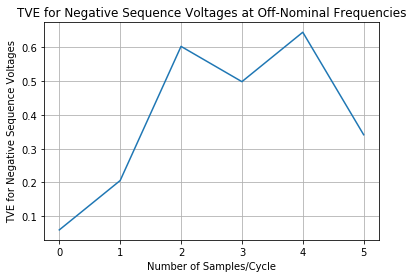

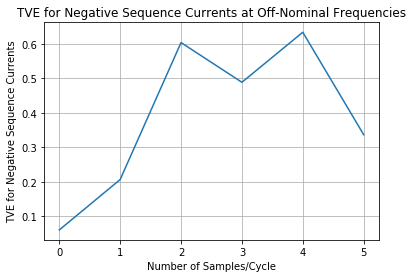

In [42]:
## Computing TVE for Part(d)

Ia  = NUMERIC[0:L,2-1];
Ib  = NUMERIC[0:L,3-1];
Ic  = NUMERIC[0:L,4-1];
Va  = NUMERIC[0:L,7-1];
Vb  = NUMERIC[0:L,8-1];
Vc  = NUMERIC[0:L,9-1];
f  = NUMERIC[0:L,12-1];

# Importing Packages
import numpy as np
import pandas as pd
import math
import cmath
import matplotlib.pyplot as plt

# Computes the Phasor for Off-Nominal Frequencies of Va
v = Va
Vaold = np.zeros((L,1),dtype=np.complex_)
Vanew = np.zeros((L,1),dtype=np.complex_)

for j in range (0, L):
    if(j<=N):
        Vaold[j] = 0;
        for k in range(0,N):
            Vaold[j] = Vaold[j] + (math.sqrt(2)/N)*v[k]*(math.cos(2*math.pi*k/N) - 1J*math.sin(2*math.pi*k/N));
        
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Vanew[j] = P*Vaold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vaold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
    else:
        Vaold[j] = (math.sqrt(2)/N)*(v[j]-v[j-N])*(math.cos(2*math.pi*(j-1)/N) - 1J*math.sin(2*math.pi*(j-1)/N)) + Vaold[j-1];
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Vanew[j] = P*Vaold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vaold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
    
# Computes the Phasor for Off-Nominal Frequencies of Vb
v = Vb
Vbold = np.zeros((L,1),dtype=np.complex_)
Vbnew = np.zeros((L,1),dtype=np.complex_)

for j in range (0, L):
    if(j<=N):
        Vbold[j] = 0;
        for k in range(0,N):
            Vbold[j] = Vbold[j] + (math.sqrt(2)/N)*v[k]*(math.cos(2*math.pi*k/N) - 1J*math.sin(2*math.pi*k/N));

        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Vbnew[j] = P*Vbold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vbold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
    else:
        Vbold[j] = (math.sqrt(2)/N)*(v[j]-v[j-N])*(math.cos(2*math.pi*(j-1)/N) - 1J*math.sin(2*math.pi*(j-1)/N)) + Vbold[j-1];
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Vbnew[j] = P*Vbold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vbold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));

# Computes the Phasor for Off-Nominal Frequencies of Vc
v = Vc;
Vcold = np.zeros((L,1),dtype=np.complex_)
Vcnew = np.zeros((L,1),dtype=np.complex_)

for j in range (0, L):
    if(j<=N):
        Vcold[j] = 0;
        for k in range(0,N):
            Vcold[j] = Vcold[j] + (math.sqrt(2)/N)*v[k]*(math.cos(2*math.pi*k/N) - 1J*math.sin(2*math.pi*k/N));

        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Vcnew[j] = P*Vcold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vcold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
    else:
        Vcold[j] = (math.sqrt(2)/N)*(v[j]-v[j-N])*(math.cos(2*math.pi*(j-1)/N) - 1J*math.sin(2*math.pi*(j-1)/N)) + Vcold[j-1];
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Vcnew[j] = P*Vcold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Vcold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));

# Computes the Phasor for Off-Nominal Frequencies of Ia
I = Ia;
Iaold = np.zeros((L,1),dtype=np.complex_)
Ianew = np.zeros((L,1),dtype=np.complex_)
for j in range (0, L):
    if(j<=N):
        Iaold[j] = 0;
        for k in range(0,N):
            Iaold[j] = Iaold[j] + (math.sqrt(2)/N)*I[k]*(math.cos(2*math.pi*k/N) - 1J*math.sin(2*math.pi*k/N));
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Ianew[j] = P*Iaold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Iaold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
    else:
        Iaold[j] = (math.sqrt(2)/N)*(I[j]-I[j-N])*(math.cos(2*math.pi*(j-1)/N) - 1J*math.sin(2*math.pi*(j-1)/N)) + Iaold[j-1];
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Ianew[j] = P*Iaold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Iaold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));

# Computes the Phasor for Off-Nominal Frequencies of Ib
I = Ib;
Ibold = np.zeros((L,1),dtype=np.complex_)
Ibnew = np.zeros((L,1),dtype=np.complex_)

for j in range (0, L):
    if(j<N):
        Ibold[j] = 0;
        for k in range(0,N):
            Ibold[j] = Ibold[j] + (math.sqrt(2)/N)*I[k]*(math.cos(2*math.pi*k/N) - 1J*math.sin(2*math.pi*k/N));

        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Ibnew[j] = P*Ibold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Ibold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
    else:
        Ibold[j] = (math.sqrt(2)/N)*(I[j]-I[j-N])*(math.cos(2*math.pi*(j-1)/N) - 1J*math.sin(2*math.pi*(j-1)/N)) + Ibold[j-1];
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Ibnew[j] = P*Ibold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Ibold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));

# Computes the Phasor for Off-Nominal Frequencies of Ic
I = Ic;
Icold = np.zeros((L,1),dtype=np.complex_)
Icnew = np.zeros((L,1),dtype=np.complex_)

for j in range (0, L):
    if(j<=N):
        Icold[j] = 0;
        for k in range(0,N):
            Icold[j] = Icold[j] + (math.sqrt(2)/N)*I[k]*(math.cos(2*math.pi*k/N) - 1J*math.sin(2*math.pi*k/N));

        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Icnew[j] = P*Icold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Icold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));
    else:
        Icold[j] = (math.sqrt(2)/N)*(I[j]-I[j-N])*(math.cos(2*math.pi*(j-1)/N) - 1J*math.sin(2*math.pi*(j-1)/N)) + Icold[j-1];
        ep = math.cos((N-1)*(f[j] - f0)*math.pi*DelT) + 1J*math.sin((N-1)*(f[j] - f0)*math.pi*DelT);
        eq = math.cos((N-1)*(f[j] + f0)*math.pi*DelT) - 1J*math.sin((N-1)*(f[j] + f0)*math.pi*DelT);
        P = ((math.sin(N*(f[j] - f0)*math.pi*DelT))/(N*math.sin((f[j] - f0)*math.pi*DelT)))*ep;
        Q = ((math.sin(N*(f[j] + f0)*math.pi*DelT))/(N*math.sin((f[j] + f0)*math.pi*DelT)))*eq;
        Icnew[j] = P*Icold[j]*(math.cos(2*math.pi*(f[j] - f0)*DelT*(j-N))+1J*math.sin(2*math.pi*(f[j] - f0)*DelT*(j-N))) + Q*np.conj(Icold[j])*(math.cos(2*math.pi*(f[j] + f0)*DelT*(j-N)) - 1J*math.sin(2*math.pi*(f[j] + f0)*DelT*(j-N)));

# Computes the Zero-Positive-Negative Sequence Voltage Phasor for un-corrected phasor
alpha = math.cos(2*math.pi/3) + 1J*math.sin(2*math.pi/3);
Vzeroold = (Vaold + Vbold + Vcold)/3;
Vposold = (Vaold + alpha*Vbold + ((alpha)*alpha)*Vcold)/3;
Vnegold = (Vaold + ((alpha)*alpha)*Vbold + alpha*Vcold)/3;

# Computes the Zero-Positive-Negative Sequence Voltage Phasor for corrected phasor
Vzeronew = (Vanew + Vbnew + Vcnew)/3;
Vposnew = (Vanew + alpha*Vbnew + ((alpha)*alpha)*Vcnew)/3;
Vnegnew = (Vanew + ((alpha)*alpha)*Vbnew + alpha*Vcnew)/3;

# Computes the Zero-Positive-Negative Sequence Current Phasor for un-corrected phasor
Izeroold = (Iaold + Ibold + Icold)/3;
Iposold = (Iaold + alpha*Ibold + ((alpha)*alpha)*Icold)/3;
Inegold = (Iaold + ((alpha)*alpha)*Ibold + alpha*Icold)/3;

# Computes the Zero-Positive-Negative Sequence Current Phasor for corrected phasor
Izeronew = (Ianew + Ibnew + Icnew)/3
Iposnew = (Ianew + alpha*Ibnew + ((alpha)*alpha)*Icnew)/3;
Inegnew = (Ianew + (alpha*alpha)*Ibnew + alpha*Icnew)/3

c = 0;

for j in range(16,L+1,16):
    c = c + 1;

TVE_V = np.zeros((c,1))
TVE_I = np.zeros((c,1))
Innewi = np.zeros((c,1))
Innewr = np.zeros((c,1))
Vnnewi = np.zeros((c,1))
Inoldi = np.zeros((c,1))
Inoldr = np.zeros((c,1))
Vnoldi = np.zeros((c,1))
Vnoldr = np.zeros((c,1))
Vnnewr = np.zeros((c,1))

c = -1;
for j in range(16,L+1,16):
    c = c + 1;
    Vnoldr[c] = np.real(Vnegold[j-1]);
    Vnoldi[c] = np.imag(Vnegold[j-1]);
    Inoldr[c] = np.real(Inegold[j-1]);
    Inoldi[c] = np.imag(Inegold[j-1]);
    Vnnewr[c] = np.real(Vnegnew[j-1]);
    Vnnewi[c] = np.imag(Vnegnew[j-1]);
    Innewr[c] = np.real(Inegnew[j-1]);
    Innewi[c] = np.imag(Inegnew[j-1]);

for j in range(0,c+1):
    TVE_V[j] = 100*math.sqrt(((Vnnewr[j] - Vnoldr[j])*(Vnnewr[j] - Vnoldr[j]) + (Vnnewi[j] - Vnoldi[j])*(Vnnewi[j] - Vnoldi[j]))/(Vnnewr[j]*Vnnewr[j] + Vnnewi[j]*Vnnewi[j]));
    TVE_I[j] = 100*math.sqrt(((Innewr[j] - Inoldr[j])*(Innewr[j] - Inoldr[j]) + (Innewi[j] - Inoldi[j])*(Innewi[j] - Inoldi[j]))/(Innewr[j]*Innewr[j] + Innewi[j]*Innewi[j]));


plt.plot(TVE_V)
plt.grid()
plt.xlabel('Number of Samples/Cycle')
plt.ylabel('TVE for Negative Sequence Voltages')
plt.title('TVE for Negative Sequence Voltages at Off-Nominal Frequencies')
plt.show()

plt.plot(TVE_I)
plt.grid()
plt.xlabel('Number of Samples/Cycle')
plt.ylabel('TVE for Negative Sequence Currents')
plt.title('TVE for Negative Sequence Currents at Off-Nominal Frequencies')
plt.show()

Since the maximum TVE for both the Negative Sequence Voltage and the Negative Sequence Current Phasors is less than 1% , which is necessary for compliance in accordance with the Synchrophasor Standard, it can infered that the PMU from which these data have been taken is indeed compliant with the desired specifications for (at least) signal magnitude and phase angle.

# References

[1] J. Chen, “Accurate Frequency Estimation with Phasor Angles”, M.S. Thesis, Electrical Engineering, Virginia Polytechnic Institute and State University, 1994.
[2] C. Xu, “High Accuracy Real-time GPS Synchronized Frequency Measurement Device for Wide-Area Power Grid Monitoring”, Ph.D. Dissertation, Electrical and Computer Engineering, Virginia Polytechnic Institute and State University, 2006.
